In [2]:
from darts import TimeSeries
from darts.dataprocessing.transformers.scaler import Scaler

In [3]:
from darts.models.forecasting.arima import ARIMA

In [4]:
import pandas as pd

In [8]:
import seaborn as sns

In [64]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [65]:
df.head()

,date,meantemp
0,01-01-2013,10.000000
1,02-01-2013,7.400000
2,03-01-2013,7.166667
3,04-01-2013,8.666667
4,05-01-2013,6.000000


In [66]:
df.tail(30)

,date,meantemp
1428,03-12-2016,21.208333
1429,04-12-2016,18.900000
1430,05-12-2016,18.636364
1431,06-12-2016,18.538462
1432,07-12-2016,18.250000
1433,08-12-2016,16.900000
1434,09-12-2016,19.416667
1435,10-12-2016,16.444444
1436,11-12-2016,20.041667
1437,12-12-2016,19.909091


In [82]:
df['dt'] = df['date'].str.strftime('%Y-%m-%d')
df.head()

AttributeError: Can only use .str accessor with string values!

In [79]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_4892\3532345252.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'])


In [80]:
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-02-01,7.400000
2,2013-03-01,7.166667
3,2013-04-01,8.666667
4,2013-05-01,6.000000


<Axes: ylabel='meantemp'>

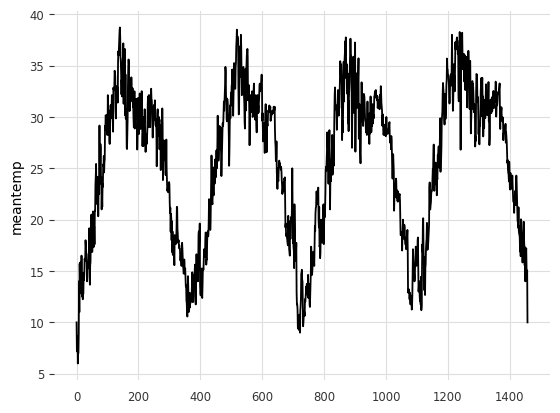

In [67]:
sns.lineplot(df['meantemp'])

In [69]:
dates_df = pd.date_range(start='01-01-2013', end='01-01-2017',freq='D')
dates_df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', length=1462, freq='D')

In [70]:
dates_df = pd.DataFrame(dates_df)

In [72]:
dates_df.columns=['dt']
dates_df.head()

,dt
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [73]:
dates_df.shape,df.shape

((1462, 1), (1458, 2))

In [83]:
final_df = dates_df.merge(df,how='left', left_on='dt',right_on='date')
final_df.head()

,dt,date,meantemp
0,2013-01-01,2013-01-01,10.000000
1,2013-01-02,2013-01-02,16.000000
2,2013-01-03,2013-01-03,17.333333
3,2013-01-04,2013-01-04,25.375000
4,2013-01-05,2013-01-05,31.857143


In [84]:
final_df.isnull().sum()

dt          0
date        4
meantemp    4
dtype: int64

In [85]:
final_df[final_df['date'].isna()]

,dt,date,meantemp
19,2013-01-20,NaT,NaN
20,2013-01-21,NaT,NaN
21,2013-01-22,NaT,NaN
22,2013-01-23,NaT,NaN


In [88]:
final_df = final_df.fillna(method='ffill')

In [89]:
final_df.head(30)

,dt,date,meantemp
0,2013-01-01,2013-01-01,10.000000
1,2013-01-02,2013-01-02,16.000000
2,2013-01-03,2013-01-03,17.333333
3,2013-01-04,2013-01-04,25.375000
4,2013-01-05,2013-01-05,31.857143
5,2013-01-06,2013-01-06,32.000000
6,2013-01-07,2013-01-07,33.857143
7,2013-01-08,2013-01-08,30.000000
8,2013-01-09,2013-01-09,30.000000
9,2013-01-10,2013-01-10,28.285714


In [11]:
train = df.iloc[:1432]
test =  df.iloc[1432:]

In [12]:
train.shape, test.shape

((1432, 2), (30, 2))

In [90]:
series = TimeSeries.from_dataframe(final_df, 'dt','meantemp')
ss =  Scaler()

In [15]:
scaled_series = ss.fit_transform(series)
len(scaled_series)

1462

In [16]:
df.shape

(1462, 2)

In [17]:
scaled_series

<TimeSeries (DataArray) (date: 1462, component: 1, sample: 1)>
array([[[0.12227074]],

       [[0.30567686]],

       [[0.34643377]],

       ...,

       [[0.24745269]],

       [[0.276718  ]],

       [[0.12227074]]])
Coordinates:
  * date       (date) datetime64[ns] 2013-01-01 2013-01-02 ... 2017-01-01
  * component  (component) object 'meantemp'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [20]:
train_xy = series[:1432]
test_xy = series[1432:]

In [21]:
len(train_xy), len(test_xy)

(1432, 30)

In [58]:
arima_model = ARIMA(p=1,d=1,q=0)
arima_model.fit(train_xy)

ARIMA(p=1, d=1, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [59]:
forecast = arima_model.predict(n=30)
forecast

<TimeSeries (DataArray) (date: 30, component: 1, sample: 1)>
array([[[19.18661023]],

       [[19.18675963]],

       [[19.18675796]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

...

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]],

       [[19.18675798]]])
Coordinates:
  * date       (date) datetime64[ns] 2016-12-03 2016-12-04 ... 2017-01-01
  * component  (component) object 'meantemp'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [60]:
forecast_df = forecast.pd_dataframe().reset_index()
forecast_df.head()

component,date,meantemp
0,2016-12-03,19.186610
1,2016-12-04,19.186760
2,2016-12-05,19.186758
3,2016-12-06,19.186758
4,2016-12-07,19.186758


In [61]:
test.head()

,date,meantemp
1432,03-12-2016,21.208333
1433,04-12-2016,18.900000
1434,05-12-2016,18.636364
1435,06-12-2016,18.538462
1436,07-12-2016,18.250000


In [62]:
from sklearn.metrics import mean_absolute_percentage_error

In [63]:
mean_absolute_percentage_error(test['meantemp'],forecast_df['meantemp'])*100

14.647592379337501

In [41]:
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing

In [42]:
exp_model = ExponentialSmoothing()

In [43]:
exp_model.fit(train_xy)
forecast_exp = exp_model.predict(n=30)
forecast_exp

<TimeSeries (DataArray) (date: 30, component: 1, sample: 1)>
array([[[19.18598956]],

       [[19.32421506]],

       [[19.17780292]],

       [[19.1375054 ]],

       [[19.39345587]],

       [[19.29722218]],

       [[19.22710671]],

       [[19.23048662]],

       [[19.36871212]],

       [[19.22229999]],

...

       [[19.31610084]],

       [[19.31948075]],

       [[19.45770625]],

       [[19.31129411]],

       [[19.27099659]],

       [[19.52694706]],

       [[19.43071337]],

       [[19.3605979 ]],

       [[19.36397781]],

       [[19.50220331]]])
Coordinates:
  * date       (date) datetime64[ns] 2016-12-03 2016-12-04 ... 2017-01-01
  * component  (component) object 'meantemp'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [44]:
forecast_exp_df = forecast_exp.pd_dataframe().reset_index()
forecast_exp_df.head()

component,date,meantemp
0,2016-12-03,19.185990
1,2016-12-04,19.324215
2,2016-12-05,19.177803
3,2016-12-06,19.137505
4,2016-12-07,19.393456


In [45]:
mean_absolute_percentage_error(test['meantemp'],forecast_exp_df['meantemp'])*100

15.405778675486228

In [ ]:
model -> 100 dollars

Marketing -> 110 Dollars (Campiagn)

Actuals -> 105 Dollars 


